In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Função para contabilizar quantidade
def quantidade(coluna, operador, condição):  
    df_qtd = df.query(f'{coluna} {operador} {condição}')[f'{coluna}'].count()
    return df_qtd

#Função para contabilizar com 3 condições
def quantidade3(coluna, operador, condição, lógico, coluna2, operador2, condição2, lógico2, coluna3, operador3, condição3):
    df_qtd = df.query(f'{coluna} {operador} {condição} {lógico} {coluna2} {operador2} {condição2} {lógico2} {coluna3} {operador3} {condição3}')[f'{coluna}'].count()
    return df_qtd

#Variáveis para alocar os dados que serão obtidos
anos = [2012, 2013, 2014, 2015, 2016, 2017, 2018]
dados_total = []
dados_qtd_pub = []
dados_qtd_pri = []
dados_pub_cr = []
dados_pri_cr = []
dados_pub_nda = []
dados_pri_nda = []
porc_pub = []
porc_pri = []
porc_pub_cr = []
porc_pri_cr = []
porc_pub_nda = []
porc_pri_nda = []

def plotar(y, nomeY, título):  #Função para Plotar gráfico de linha
    plt.plot(anos, y)          #Plot do gráfico de linha
    plt.scatter(anos, y)       #Plot do gráfico de dispersão (bolinhas)
    plt.xlabel('Anos')         #Texto do eixo X
    plt.ylabel(nomeY)          #Texto do eixo Y
    plt.title(título)          #Texto do título
    plt.show()

def comparar(barra1, nome1, barra2, nome2, textoY, Título): #Plotar gráfico de barras agrupados para comparação
    qtd = np.arange(len(anos))                                 # Localização dos textos (anos)
    larg = 0.4                                                 # Largura das barras
    
    fig, ax = plt.subplots(figsize=(10, 6)) 
    gr1 = ax.bar(qtd - larg/2, barra1, larg, label=nome1)      # gr1 (gráfico 1) plota gráfico de barras da esquerda
    gr2 = ax.bar(qtd + larg/2, barra2, larg, label=nome2)      # gr2 (gráfico 2) plota gráfico de barras da direita

    # Adicionar textos
    ax.set_ylim(0, 100)                                          #Define o valor mínimo e máximo exibido no eixo Y
    ax.set_ylabel(textoY, fontsize = 20)                         #Nome eixo Y
    ax.set_xlabel('Anos', fontsize = 15)                         #Nome do eixo X
    ax.set_title(Título)                                         #Nome do título
    ax.set_xticks(qtd)                                           #Nome embaixo das barras
    ax.set_xticklabels(anos)                                     #Nome dos textos das barras (anos)
    ax.legend()                                                  #Legenda das barras
    
    for gr in gr1:
        alt = gr.get_height()                                   #Recupera o valor da altura das barras
        ax.annotate('{:.2f}'.format(alt),                       #Método annotate (anotação), formatado (2 casas depois da vírgula), criando anotação na altura das barras (alt)
                    xy=(gr.get_x() + gr.get_width() / 2, alt),  #Parâmetros eixos X e Y (coordenada onde a anotação será colocada)
                    xytext=(-3, 3),  # 3 points vertical offset  #Parâmetro da localização do texto da anotação
                    textcoords="offset points",                 #Sistema de coordenadas usados no parâmetro 'xytext'
                    ha='center', va='bottom')                   #Alinhamento do texto
    
    for gr in gr2:
        alt = gr.get_height()                                   
        ax.annotate('{:.2f}'.format(alt),                       
                    xy=(gr.get_x() + gr.get_width() / 2, alt),  
                    xytext=(4, 3),  # 3 points vertical offset  
                    textcoords="offset points",                 
                    ha='center', va='bottom') 
    
    fig.tight_layout()                                           #Ajusta o layout do gráfico
    plt.show()

In [3]:
#Nome das colunas de 2012 até 2014
col1 = 'ID_DEPENDENCIA_ADM'
col2 = 'ID_COZINHA'
col3 = 'ID_REFEITORIO'

for ano in anos:
    if ano >= 2015:
        #Novo nome das colunas, referente ao período de 2015 até 2018
        col1 = 'TP_DEPENDENCIA'
        col2 = 'IN_COZINHA'
        col3 = 'IN_REFEITORIO'
    df = pd.read_csv(f'D:\Pastas\Documentos\Análise de dados\Dados Censo INEP\{ano}\ESCOLAS.csv', sep = '|', encoding = 'ANSI', usecols = [f'{col1}',f'{col2}',f'{col3}'])
    
    total_esc = df[col1].count()
    qtd_esc_pub = quantidade(col1, '!=', '4')   ##Quantidade de escolas públicas
    qtd_esc_pri = quantidade(col1, '==', '4')   ##Quantidade de escolas privadas
    porcentagem_pub = (qtd_esc_pub / total_esc * 100)
    porcentagem_pri = (qtd_esc_pri / total_esc * 100)
    
    qtd_pub_CozRef = quantidade3(col1, '!=', '4', 'and', col2, '==', '1', 'and', col3, '==', '1')
    qtd_pri_CozRef = quantidade3(col1, '==', '4', 'and', col2, '==', '1', 'and', col3, '==', '1')
    
    qtd_pub_sem_nada = quantidade3(col1, '!=', '4', 'and', col2, '==', '0', 'and', col3, '==', '0')
    qtd_pri_sem_nada = quantidade3(col1, '==', '4', 'and', col2, '==', '0', 'and', col3, '==', '0')
    
    porcentagem_pub_CR = (qtd_pub_CozRef / qtd_esc_pub * 100)
    porcentagem_pri_CR = (qtd_pri_CozRef / qtd_esc_pub * 100)
    porcentagem_pub_sem = (qtd_pub_sem_nada / qtd_esc_pub * 100)
    porcentagem_pri_sem = (qtd_pri_sem_nada / qtd_esc_pub * 100)
    
    dados_total.append(total_esc)
    dados_qtd_pub.append(qtd_esc_pub)
    dados_qtd_pri.append(qtd_esc_pri)
    dados_pub_cr.append(qtd_pub_CozRef)
    dados_pri_cr.append(qtd_pri_CozRef)
    dados_pub_nda.append(qtd_pub_sem_nada)
    dados_pri_nda.append(qtd_pri_sem_nada)
    porc_pub.append(porcentagem_pub)
    porc_pri.append(porcentagem_pri)
    porc_pub_cr.append(porcentagem_pub_CR)
    porc_pri_cr.append(porcentagem_pri_CR)
    porc_pub_nda.append(porcentagem_pub_sem)
    porc_pri_nda.append(porcentagem_pri_sem)

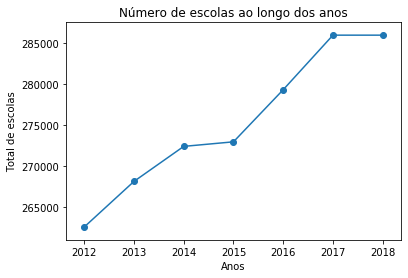

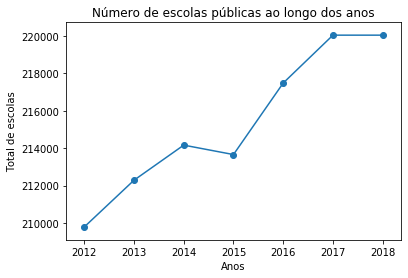

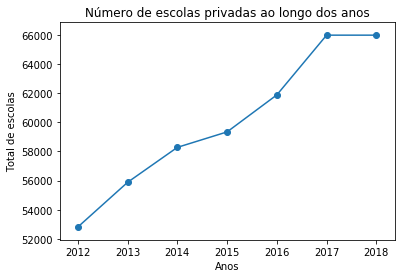

In [4]:
plotar(dados_total, 'Total de escolas', 'Número de escolas ao longo dos anos')
plotar(dados_qtd_pub, 'Total de escolas', 'Número de escolas públicas ao longo dos anos')
plotar(dados_qtd_pri, 'Total de escolas', 'Número de escolas privadas ao longo dos anos')

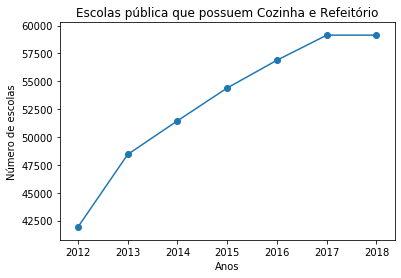

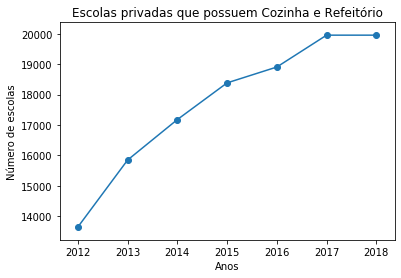

In [5]:
plotar(dados_pub_cr, 'Número de escolas', 'Escolas pública que possuem Cozinha e Refeitório')
plotar(dados_pri_cr, 'Número de escolas', 'Escolas privadas que possuem Cozinha e Refeitório')

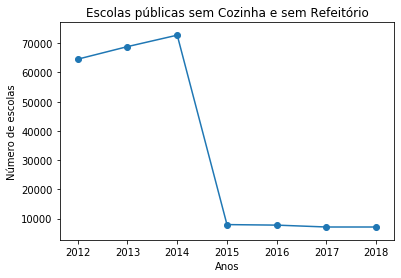

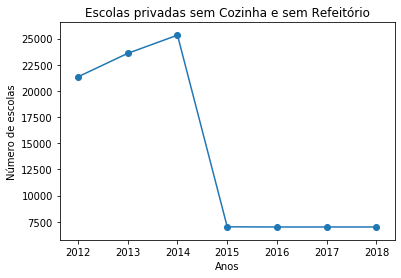

In [6]:
plotar(dados_pub_nda, 'Número de escolas', 'Escolas públicas sem Cozinha e sem Refeitório')
plotar(dados_pri_nda, 'Número de escolas', 'Escolas privadas sem Cozinha e sem Refeitório')

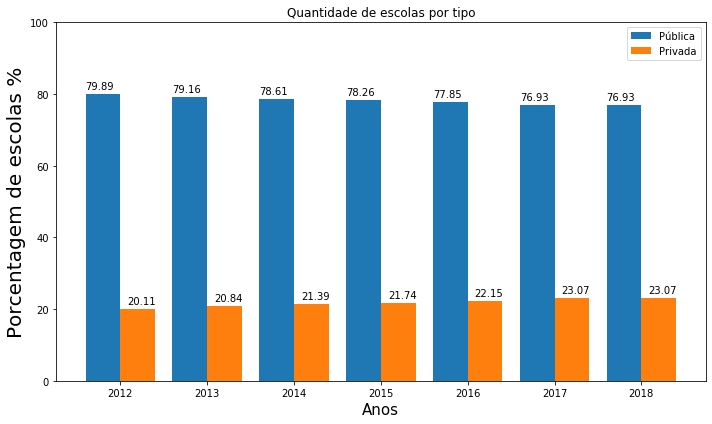

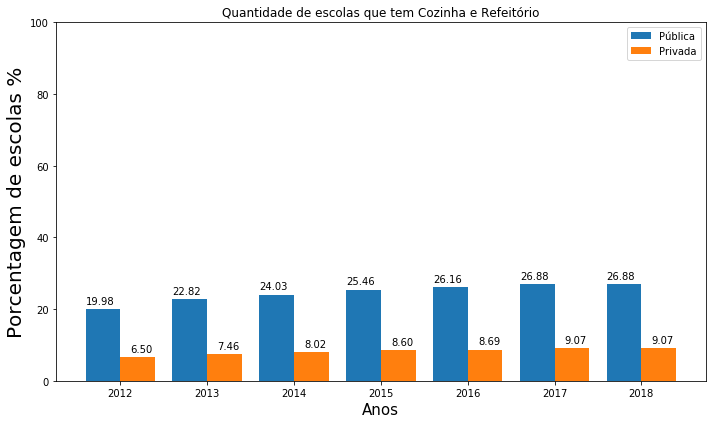

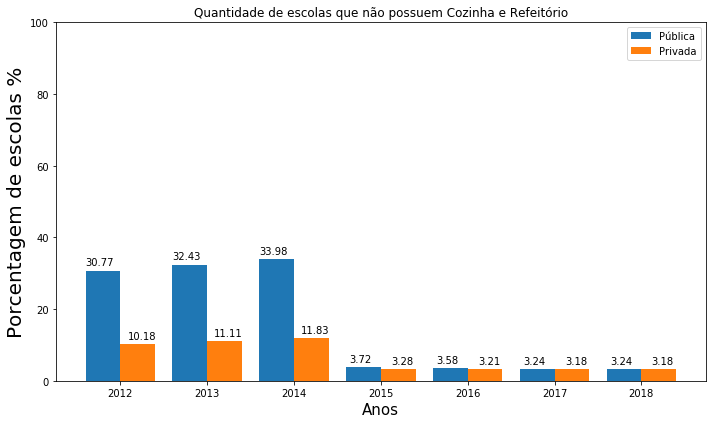

In [7]:
comparar(porc_pub, 'Pública', porc_pri, 'Privada', 'Porcentagem de escolas %', 'Quantidade de escolas por tipo')
comparar(porc_pub_cr, 'Pública', porc_pri_cr, 'Privada', 'Porcentagem de escolas %', 'Quantidade de escolas que tem Cozinha e Refeitório')
comparar(porc_pub_nda, 'Pública', porc_pri_nda, 'Privada', 'Porcentagem de escolas %', 'Quantidade de escolas que não possuem Cozinha e Refeitório')

In [8]:
#Criação de um dicionário para agrupar os dados
dados = {}
dados['Total'] = dados_total
dados['Escola_publica'] = dados_qtd_pub
dados['Escola_Privada'] = dados_qtd_pri
dados['Pub_CozRef'] = dados_pub_cr
dados['Pri_CozRef'] = dados_pri_cr
dados['Pub_Nada'] = dados_pub_nda
dados['Pri_Nada'] = dados_pri_nda

#Criação de um DataFrame para melhor visualização em números
df = pd.DataFrame (data = dados, index = [anos])
df

,Total,Escola_publica,Escola_Privada,Pub_CozRef,Pri_CozRef,Pub_Nada,Pri_Nada
2012,262601,209783,52818,41923,13640,64548,21346
2013,268166,212283,55883,48437,15845,68845,23589
2014,272440,214160,58280,51453,17177,72762,25329
2015,272996,213656,59340,54399,18385,7956,7009
2016,279358,217480,61878,56889,18907,7776,6990
2017,286014,220039,65975,59138,19956,7131,6992
2018,286014,220039,65975,59138,19956,7131,6992
